<a href="https://colab.research.google.com/github/MasahiroAraki/MLCourse/blob/master/Python/answer/15a_reinforce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 第15章 強化学習

## 課題1 

報酬の平均値は学習の進行に伴って上がってはいますが、かなり不安定です。学習時のハイパーパラメータを変更して、安定的に学習ができるようにしてください。

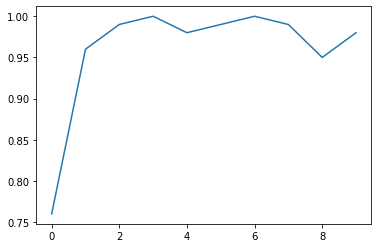

In [1]:
import numpy as np
import matplotlib.pylab as plt
import gym

env = gym.make('FrozenLake-v0', is_slippery=False) #滑らない設定
N_ACT = env.action_space.n
N_OBS = env.observation_space.n

q = np.zeros([N_OBS, N_ACT]) #Q値を0で初期化

#学習時のハイパーパラメータ
EPOCKS = 1000
MAX_ITERATIONS = 100
epsilon = 0.01 #0.3から変更
gamma = 0.9
eta = 0.9
 
rewards = np.zeros(EPOCKS) #各エポックでの報酬を記録するarray

for epoch in range(EPOCKS):
    obs = env.reset()
    done = False
    for step in range(MAX_ITERATIONS):
        act = np.argmax(q[obs, :]) #Q値が最大となる行為を求める
        act = np.random.choice(np.where(q[obs, :] == q[obs, act])[0]) #同じ値となるものがあれば、その中からランダムで選択
        if np.random.rand() <= epsilon: #確率epsilonでランダムに行為を選択
            act = env.action_space.sample()
        next_obs, reward, done, info = env.step(act) #行為を実行
        if not done: #最終状態（GまたはH）ではないか？
            q[obs, act] += eta * (reward - q[obs, act] + gamma * np.max(q[next_obs, :])) #TD法
        else:
            q[obs, act] += eta * (reward - q[obs, act])
        obs = next_obs
        rewards[epoch] = reward
        if done:
            break
            
rates = np.average(rewards.reshape([EPOCKS//100, 100]), axis = 1) #100エポック毎の報酬の平均値を求める
plt.plot(rates)
plt.show()

上記のようにepsilonの値を小さくします。無駄な探索が減って、報酬が安定します。

## 課題2

下記のように滑る設定にした上で、学習時のハイパーパラメータを調整してうまく学習できるようにしてください。

env = gym.make('FrozenLake-v0') #滑る設定

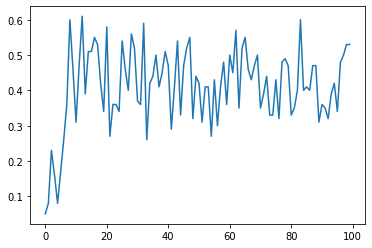

In [11]:
import numpy as np
import matplotlib.pylab as plt
import gym

env = gym.make('FrozenLake-v0') #滑る設定
N_ACT = env.action_space.n
N_OBS = env.observation_space.n

q = np.zeros([N_OBS, N_ACT]) #Q値を0で初期化

#学習時のハイパーパラメータ
EPOCKS = 10000 #1000から変更
MAX_ITERATIONS = 100
epsilon = 0.01  #0.3から変更
gamma = 0.9
eta = 0.5  #0.9から変更
 
rewards = np.zeros(EPOCKS) #各エポックでの報酬を記録するarray

for epoch in range(EPOCKS):
    obs = env.reset()
    done = False
    for step in range(MAX_ITERATIONS):
        act = np.argmax(q[obs, :]) #Q値が最大となる行為を求める
        act = np.random.choice(np.where(q[obs, :] == q[obs, act])[0]) #同じ値となるものがあれば、その中からランダムで選択
        if np.random.rand() <= epsilon: #確率epsilonでランダムに行為を選択
            act = env.action_space.sample()
        next_obs, reward, done, info = env.step(act) #行為を実行
        if not done: #最終状態（GまたはH）ではないか？
            q[obs, act] += eta * (reward - q[obs, act] + gamma * np.max(q[next_obs, :])) #TD法
        else:
            q[obs, act] += eta * (reward - q[obs, act])
        obs = next_obs
        rewards[epoch] = reward
        if done:
            break
            
rates = np.average(rewards.reshape([EPOCKS//100, 100]), axis = 1) #100エポック毎の報酬の平均値を求める
plt.plot(rates)
plt.show()

問題が難しくなっているのでエポック数を増やします。また、負の報酬が得られやすくなっているので、学習係数をやや低めにすると、平均報酬で0.5程度が実現できます。